In [1]:
import Supernovae_class as Svae

Let's have a simple example, where there is a hiden $\alpha$ parameter that regulates the frequency of a time-series. There is also a parameter $\beta$ which is a noise term.

$Y = sin(\alpha x+\beta)$ 

In [2]:
import numpy as np
example = np.zeros((180,360))

In [3]:
np.random.seed(1)
strip = np.ones((18,360))
rand = np.random.rand(10)
strips = [rand[i] * strip for i in range(0,10)]
pattern = np.concatenate(strips, axis = 0)
pattern.shape

(180, 360)

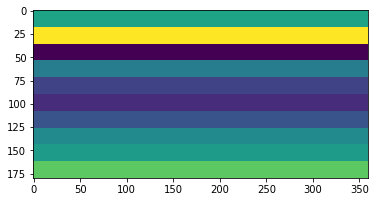

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(pattern)

In [5]:
time_size = 696

import math
x =  np.arange(time_size)
world = np.zeros((180,360,time_size))
random_offset = np.random.rand((180*360)).reshape(180,360)
for lon in range(180):
    for lat in range(360):
        a = pattern[lon, lat]
        b = random_offset[lon, lat]*6.2831
        world[lon, lat] = np.sin(a*x+b)

(180, 360, 696)

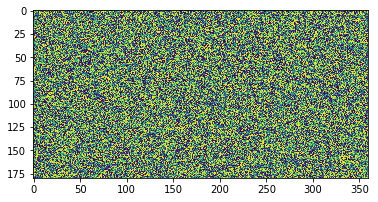

In [6]:
plt.imshow(world[:,:, 50])
world.shape

In [2]:
supernovae_1 = Svae.supernovae()

Configuration file found


In [3]:
# If there is no config file we must create one
supernovae_1.create_conf_file( Name_model = "World_toy_Example",
                             Description = "This is an example of use of SupernoVAE",
                             Network_folder = "World_test_main_folder",
                             Name_datafile = "World_toy",
                             Verbosity = "Debug",
                             Theta = 0.1,
                             Time_size = 696)


Cheking if file system exists


In [ ]:
# We load again the package once the config file has been created
import Supernovae_class as Svae

In [9]:
supernovae_1.save_data_tf(world)

The dataset has been saved in TF format


### Training the model
Once the Svae object is created, the data is stored in Tensorflow format in the folder: 'Network_folder/input_data/' this is done by the function `save_data_tf()`.

Then, the model can be trained with the function of the `train_svae()`. At the end of the training Tensorflow will print the result of the loss function. This is desirable to be as small as possible, and indicate us if the training `N_steps` is enought.

In [12]:
supernovae_1.train_svae(N_steps= 10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'World_test_main_folder/model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4e763eab38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'World_test_main_folder/model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, 

Once the model is trained we can compute the embeddings for each time-series. This will be stored in a the folder `network_folder/output`. Given that the trained model is stored this action can be done in a diferent session.


In [ ]:
supernovae_1.tf.logging.set_verbosity(supernovae_1.tf.logging.DEBUG)
supernovae_1.predict()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'World_test_main_folder/model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8541096198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
SAMPLE NOT FOUND::::! Lorenz_model_main_folder/input_data/world_l_norm_000_000.bin
SAMPLE NOT FOUND::::! Lorenz_model_main_folder/input_data/world_l_norm_000_001.bin
SAMPLE NOT FOUND::::! Lorenz_model_main_folder/input_data/world_l_norm_000_002.bin
SAMPLE NOT FOUND::::! Lorenz_model_main_folder/input_data/world_l_norm_000_003

In [ ]:
supernovae_1.embeddings

In [45]:
    def save_data_tf(dataset, max_lon = 180, max_lat = 360):
        dataset = dataset.astype('float32')

        folder = 'test_function_save_data/'
        Name = 'test' + '_'
        name = None

        # Save it
        for lat in range(1,max_lon):
            for lon in range(1,max_lat):
                i = lat - 1
                j = lon - 1
                sample = dataset[:,i:i+1,j:j+1]
                name = str(folder)+'/' +str(Name) + str(lat).zfill(3) + '_' + str(lon).zfill(3) + '.bin'
                sample.tofile(name)
                print(name)
                pass
            pass
        print('The dataset has been saved in TF format')

In [46]:
save_data_tf(world
        )

test_function_save_data//test_001_001.bin
test_function_save_data//test_001_002.bin
test_function_save_data//test_001_003.bin
test_function_save_data//test_001_004.bin
test_function_save_data//test_001_005.bin
test_function_save_data//test_001_006.bin
test_function_save_data//test_001_007.bin
test_function_save_data//test_001_008.bin
test_function_save_data//test_001_009.bin
test_function_save_data//test_001_010.bin
test_function_save_data//test_001_011.bin
test_function_save_data//test_001_012.bin
test_function_save_data//test_001_013.bin
test_function_save_data//test_001_014.bin
test_function_save_data//test_001_015.bin
test_function_save_data//test_001_016.bin
test_function_save_data//test_001_017.bin
test_function_save_data//test_001_018.bin
test_function_save_data//test_001_019.bin
test_function_save_data//test_001_020.bin
test_function_save_data//test_001_021.bin
test_function_save_data//test_001_022.bin
test_function_save_data//test_001_023.bin
test_function_save_data//test_001_